# 1  查看标签持续时间

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
def get_dataframe(test_result_dataframe):
    test_result_dataframe.rename(columns={0: 'time',1:'label'}, inplace=True)
    label_test_duration = test_result_dataframe.groupby('label')['time'].count().reset_index(name='duration')
    label_test_duration['duration'] = label_test_duration['duration']
    return label_test_duration

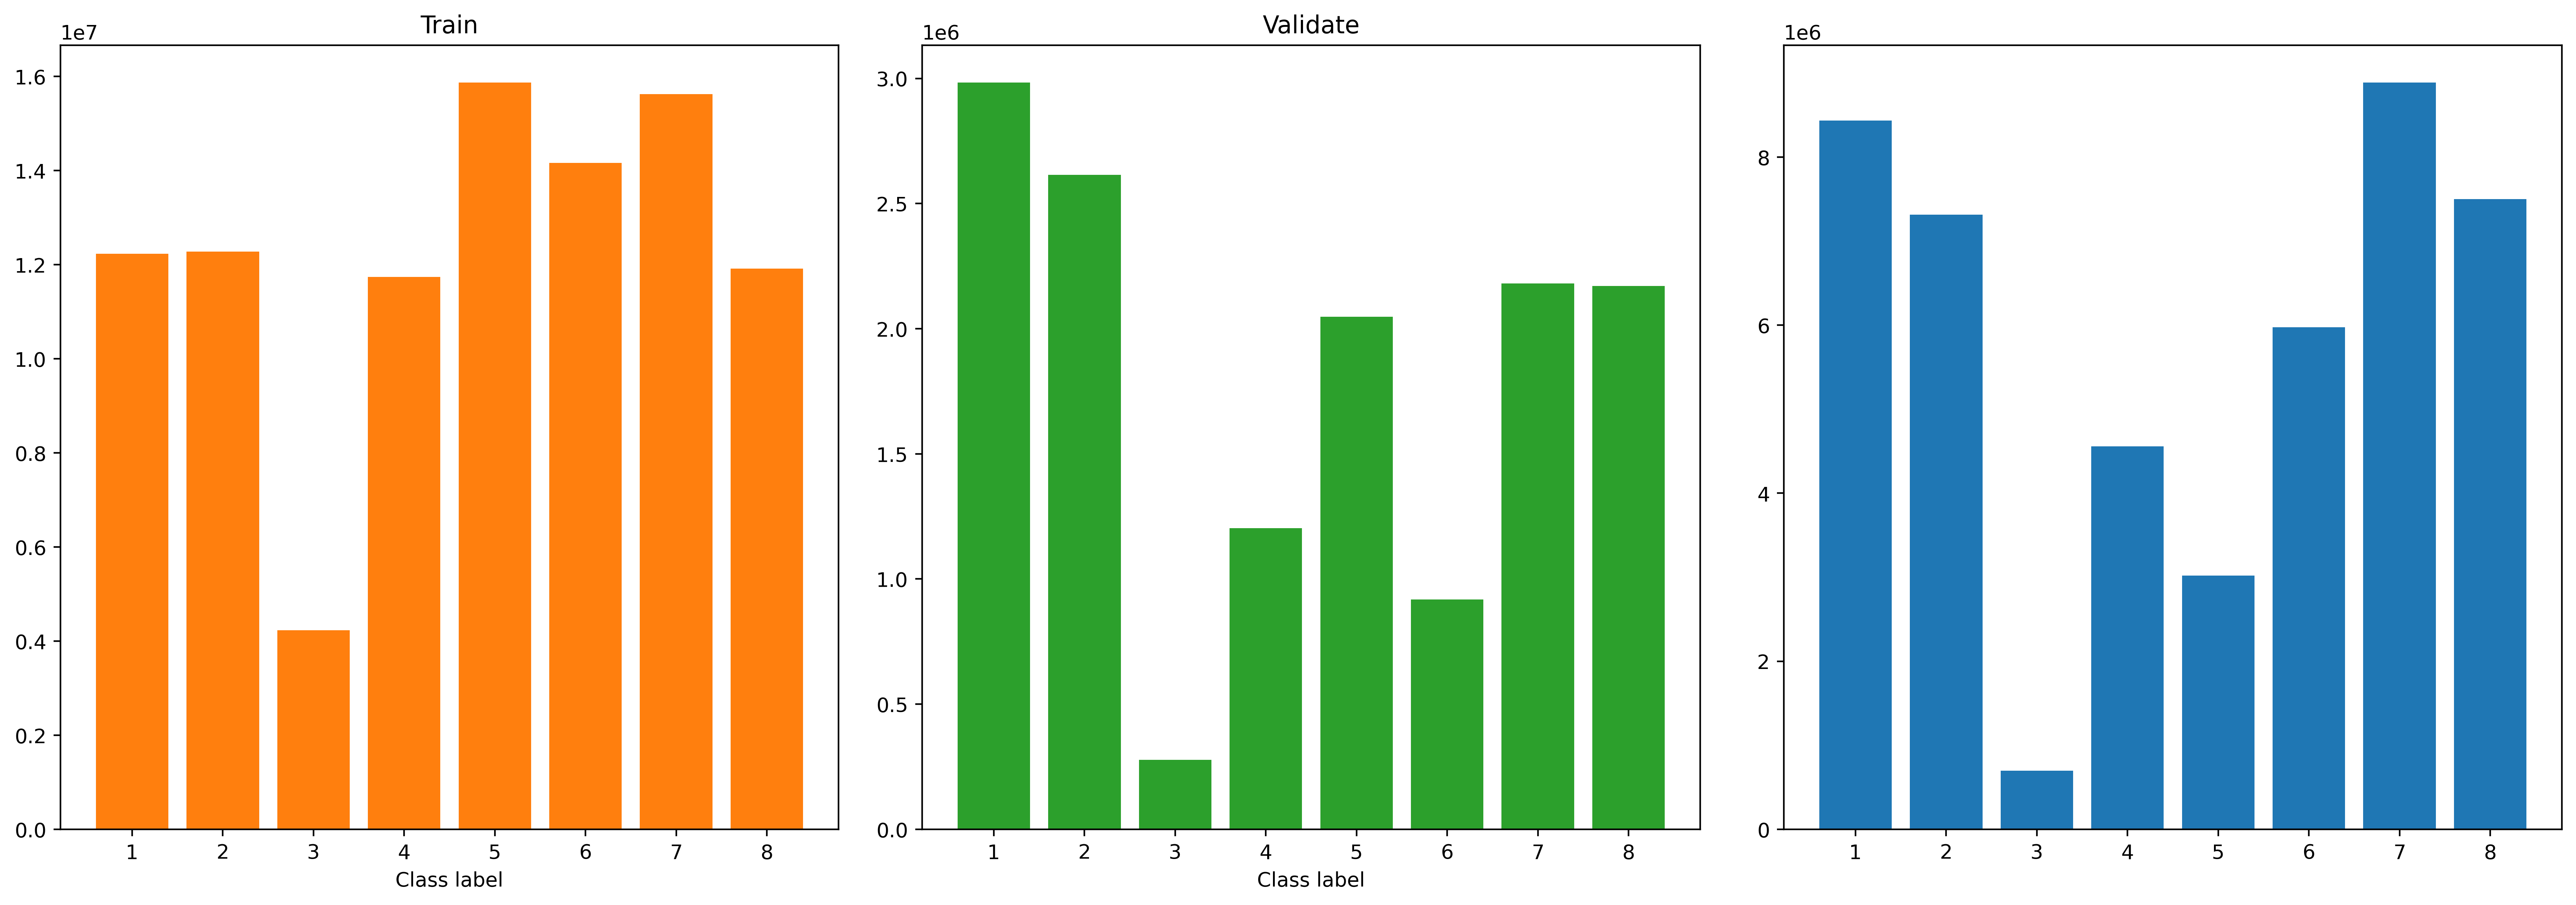

In [2]:
data_path_test = '/home/jnli/SHL_2023/SHL2023/data2023/test'
file_path = "{}/Fighting_zsn_predictions.txt".format(data_path_test)
test_result_dataframe = pd.read_csv(file_path, sep="\t", header=None)
label_test_duration = get_dataframe(test_result_dataframe)
label_test_duration_6_25_1 = label_test_duration
train_label = pd.read_table('/home/jnli/SHL_2023/SHL2023/data2023/train/Bag/Label.txt', header = None, sep = "\t")
label_train_duration = get_dataframe(train_label)

validate_label = pd.read_table('/home/jnli/SHL_2023/SHL2023/data2023/validate/Bag/Label.txt', header = None, sep = "\t")
label_validate_duration = get_dataframe(validate_label)
dpi = 400
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:4]
fig, axs = plt.subplots(nrows=1, ncols=3, dpi=dpi, figsize=(18, 6))
fig.tight_layout()

ax = axs[0]
ax.bar(label_train_duration['label'], label_train_duration['duration'], label='Train', color=colors[1])
ax.set(xticks=label_train_duration['label'].unique())
# ax.set(yticks=np.arange(0, 10)) 
ax.set(xlabel='Class label', title='Train')

ax = axs[1]
ax.bar(label_validate_duration['label'], label_validate_duration['duration'], label='Validate', color=colors[2])
ax.set(xticks=label_validate_duration['label'].unique())
# ax.set(yticks=np.arange(0, 2)) 
ax.set(xlabel='Class label', title='Validate')

ax = axs[2]
ax.bar(label_test_duration['label'], label_test_duration['duration'], label='Test', color=colors[0])
ax.set(xticks=label_test_duration['label'].unique())
# ax.set(yticks=np.arange(0, 5)) 
# ax.set(ylabel='Duration [h]', xlabel='Class label', title='Test')
plt.show()

In [3]:
test_result_dataframe

,time,label
0,2497349368580,2
1,2497349368590,2
2,2497349368600,2
3,2497349368610,2
4,2497349368620,2
...,...,...
46385811,3500971089580,2
46385812,3500971089590,2
46385813,3500971089600,2
46385814,3500971089610,2


In [5]:
label_train_duration['duration']/label_test_duration_6_25_1['duration']

0     1.564367
1     1.647172
2    26.910987
3     2.935972
4     4.483894
5     2.111705
6     1.601910
7     1.712917
Name: duration, dtype: float64

In [13]:
# 2.5  确认一下测试集的时间戳有没有错
data_path_test = '/home/jnli/SHL_2023/SHL2023/data2023/test'
# data_processed_validate = pd.read_csv('{}/get_road_feature.csv'.format(data_path_test))
label_index  = pd.read_table('/home/jnli/SHL_2023/SHL2023/data2023/test/Label_idx.txt', header = None)
label_index.iloc[:, 0]= label_index.iloc[:, 0].astype('int')
# data_processed_validate['time_all'] = data_processed_validate['time_all'].apply(lambda x: x.strip('[]'))
# timestamps = data_processed_validate['time_all'].str.split(',').explode().reset_index(drop=True).astype(int)
# sum(timestamps == label_index.iloc[:, 0]) #46385816

In [16]:
sum(test_result_dataframe['time'] == label_index.iloc[:, 0])

46385816

In [7]:
label_test_duration

,label,duration
0,1,8434600
1,2,7315616
2,3,695800
3,4,4556200
4,5,3019000
5,6,5974000
6,7,8888100
7,8,7502500


# 2  数据增强

# 2.1 只补最少的那一类

In [8]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
drop_columns_1 =  ['Unnamed: 0',
 'Unnamed: 0.1',
  'Unnamed: 0.1.1',
 'label_all',
 'time_all',
 'time',
 'label_mode',
 'label_num',
 'time_series1',
 'time_series2',
 'time_y',
 'time_series3',
 'time_z' ,
 'eid',
 ]
drop_columns_2 =  ['Unnamed: 0',
 'Unnamed: 0.1',
  'Unnamed: 0.1.1',
 'label_all',
 'time_all',
 'time',
 'label_num',
 'time_series1',
 'time_series2',
 'time_y',
 'time_series3',
 'time_z' ,
 'eid']

import pandas as pd
import numpy as np
from collections import Counter
# 训练集 平均产生新数据
def balance_dataframe(data_path, target_class=3):
    # 计算需要增加的数据量
    df_data = pd.read_csv('{}/get_last_features.csv'.format(data_path))
    target_count = df_data['label_mode'].value_counts()[target_class]
    if 'train' in data_path:
        num_samples_to_add = 70000
    else:
        num_samples_to_add = 7000
    print('raw length:', len(df_data))
    print(Counter(df_data['label_mode']))
    print('num_samples_to_add:', num_samples_to_add)

    # 获取目标类别的数据
    df = df_data.drop(drop_columns_1, axis=1)
    target_data = df[df_data['label_mode'] == target_class]
    timestamp =df_data['time'][df_data['label_mode'] == target_class]

    new_samples = []
    k = 0 
    while k <=num_samples_to_add:
        random_index = np.random.randint(0, len(target_data) - 1)
        selected_sample = target_data.iloc[random_index]

        # 获取上一条或下一条数据的索引

        if random_index == 0:
            neighbor_index = random_index + 1
        elif random_index == len(target_data) - 1:
            neighbor_index = random_index - 1
        else:
            random_direction = np.random.choice([-1, 1])  # 随机选择上一条或下一条
            neighbor_index = random_index + random_direction
        if abs(timestamp.iloc[neighbor_index] - timestamp.iloc[random_index]) == 1000:
            k+=1
            neighbor_sample = target_data.iloc[neighbor_index]
        

            # 计算新样本的均值
            new_sample = (selected_sample + neighbor_sample) / 2
            new_sample = pd.DataFrame(new_sample).T 
            new_samples.append(new_sample)

    # 将新样本添加到原始数据集
    new_samples = pd.concat(new_samples, axis=0)
    new_samples['label_mode'] = target_class  # 设置新样本的标签
    df_concatenated = pd.concat([df_data.drop(drop_columns_2, axis=1), new_samples], ignore_index=True)
    print('now new length:', len(df_concatenated))
    print(Counter(df_concatenated['label_mode']))
    df_concatenated.to_csv('{}/get_last_features_balanced_2.csv'.format(data_path))
    print('balance_data save well')

In [9]:
data_path_train_1 =  '/home/jnli/SHL_2023/SHL2023/data2023/train/Bag'
data_path_train_2 =  '/home/jnli/SHL_2023/SHL2023/data2023/train/Hand'
data_path_train_3 =  '/home/jnli/SHL_2023/SHL2023/data2023/train/Hips'
data_path_train_4 =  '/home/jnli/SHL_2023/SHL2023/data2023/train/Torso'

In [ ]:
balance_dataframe(data_path_train_1)
balance_dataframe(data_path_train_2)
balance_dataframe(data_path_train_3)
balance_dataframe(data_path_train_4)

raw length: 980525
Counter({5: 158699, 7: 156258, 6: 141639, 2: 122769, 1: 122303, 8: 119175, 4: 117401, 3: 42281})
num_samples_to_add: 70000


100%|██████████| 70000/70000 [02:45<00:00, 422.01it/s]


now new length: 1050525
Counter({5: 158699, 7: 156258, 6: 141639, 2: 122769, 1: 122303, 8: 119175, 4: 117401, 3: 112281})
balance_data save well
raw length: 980525
Counter({5: 158699, 7: 156258, 6: 141639, 2: 122769, 1: 122303, 8: 119175, 4: 117401, 3: 42281})
num_samples_to_add: 70000


100%|██████████| 70000/70000 [02:33<00:00, 455.38it/s]


now new length: 1050525
Counter({5: 158699, 7: 156258, 6: 141639, 2: 122769, 1: 122303, 8: 119175, 4: 117401, 3: 112281})
balance_data save well
raw length: 980525
Counter({5: 158699, 7: 156258, 6: 141639, 2: 122769, 1: 122303, 8: 119175, 4: 117401, 3: 42281})
num_samples_to_add: 70000


100%|██████████| 70000/70000 [01:38<00:00, 710.81it/s]


now new length: 1050525
Counter({5: 158699, 7: 156258, 6: 141639, 2: 122769, 1: 122303, 8: 119175, 4: 117401, 3: 112281})
balance_data save well
raw length: 980525
Counter({5: 158699, 7: 156258, 6: 141639, 2: 122769, 1: 122303, 8: 119175, 4: 117401, 3: 42281})
num_samples_to_add: 70000


100%|██████████| 70000/70000 [01:29<00:00, 785.55it/s]


now new length: 1050525
Counter({5: 158699, 7: 156258, 6: 141639, 2: 122769, 1: 122303, 8: 119175, 4: 117401, 3: 112281})
balance_data save well


# 3 特征选择

In [8]:
import pandas as pd
import numpy as np

In [7]:
feature_dict1 = {'norm_acc_std_window_20_mean': 0.32408260619411783, 'norm_acc_energy': 0.20834259862303234, 'distance_railways': 0.19602124694244943, 'distance_subway': 0.16697427264568254, 'speed_wd_max_log': 0.14966462493369015, 'code': 0.14098785254954935, 'distance_bus_routes': 0.12392275082093462, 'norm_acc_std': 0.09786245885840905, 'speed_log': 0.0740791871446469, 'speed_square': 0.06263273093976847, 'norm_mag_peak_frequency_window_20_mean': 0.0613174817328271, 'norm_acc_entropy': 0.06070995944806587, 'ACC_y_std_window_20_mean': 0.04860076780378457, 'distance_parks': 0.047559055955268756, 'distance_London': 0.04505388190603408, 'north': 0.03737089593753589, 'MAG_y_energy': 0.03711268403823448, 'distance_bus_stops': 0.03649277848729929, 'norm_gyr_min_window_20_mean': 0.035865132420750304, 'latitude': 0.03256179669182618, 'acc_wd_std': 0.0316419703044136, 'ACC_x_energy': 0.026925098228705438, 'distance_Brighton': 0.02588658601101669, 'GYR_z_entropy': 0.025825616720359115, 'GYR_x_entropy': 0.024646147387385554, 'number_window_20_mean': 0.023512805665299286, 'is_stop': 0.023434673185007193, 'speed_dif': 0.023001672618778293, 'ACC_y_peak_frequency': 0.02235244712922947, 'ACC_y_std': 0.02226511031264558, 'longitude_window_20_std': 0.021484307026307388, 'distance': 0.02102747239082539, 'norm_acc_cal_range': 0.020809498139610447, 'east': 0.020038579229314485, 'norm_acc_peak_frequency': 0.019318345816884873, 'norm_acc_max': 0.01880650711739225, 'ACC_x_std': 0.018108726850901213, 'ACC_y_energy': 0.017606409806845857, 'number': 0.017559957130946102, 'longitude': 0.0172708681695523, 'norm_gyr_median': 0.017255713467737868, 'norm_gyr_median_window_20_mean': 0.015885221737008206, 'ACC_z_mean': 0.015453872479948456, 'gps_snr_mean_window_20_mean': 0.014431344533667841, 'GYR_z_std': 0.013642271097210173, 'norm_gyr_max': 0.013586708946800842, 'speed': 0.012998828108917554, 'ACC_x_entropy': 0.012285408073271933, 'ACC_y_entropy': 0.0117283935921907, 'gps_snr_mean': 0.011077104325570917, 'ACC_z_median': 0.010987822258437223, 'norm_mag_avg_frequency': 0.010771741746936452, 'speed_wd_std': 0.010665300258870955, 'gps_snr_max': 0.010621671933432216, 'ACC_y_max': 0.009792141967573536, 'acc_wd_max_log': 0.008970037739152266, 'north_speed': 0.00887755016822827, 'MAG_x_std': 0.0087940720853589, 'accuracy': 0.008656889128337397, 'ACC_x_cal_range': 0.008464931250818755, 'norm_acc_min': 0.008070707596678214, 'norm_mag_min': 0.007808134476147935, 'longitude_window_20_mean': 0.00773974540286288, 'GYR_z_cal_range': 0.0076735119640591355, 'GYR_z_peak_frequency': 0.007661249843628825, 'norm_gyr_min': 0.007609748212934132, 'GYR_x_max': 0.007565430432077899, 'norm_mag_median': 0.0072861465097882674, 'GYR_y_energy': 0.007062593488387009, 'norm_acc_mean': 0.006891115840757062, 'altitude': 0.006454343681615185, 'norm_mag_cal_range': 0.006309550887667134, 'GYR_z_avg_frequency': 0.006247834613941946, 'GYR_y_peak_frequency': 0.006243608507480776, 'ACC_x_peak_frequency': 0.006011330921879112, 'ACC_z_min': 0.005960876406459607, 'GYR_y_std': 0.0056926182039771026, 'ACC_y_min': 0.005642918546807764, 'norm_gyr_avg_frequency': 0.005546300007543119, 'speed_dlt': 0.0048876880092554266, 'GYR_x_peak_frequency': 0.0048693432708059115, 'ACC_y_mean': 0.00471938283370003, 'north_dlt': 0.004668212369948412, 'ACC_y_cal_range': 0.004584370665216527, 'error': 0.004583088222063201, 'MAG_x_cal_range': 0.004511287908081555, 'ACC_x_avg_frequency': 0.004460863033772676, 'ACC_y_avg_frequency': 0.0044257523759431705, 'gps_snr_std': 0.00434955148368994, 'ACC_z_max': 0.004312750190663827, 'norm_mag_max': 0.004282675646142865, 'MAG_x_energy': 0.004224140644004497, 'GYR_y_std_window_20_mean': 0.004069096495410596, 'MAG_y_median': 0.004065918624794037, 'GYR_x_std': 0.0040161293607511445, 'MAG_z_energy': 0.004000262933607013, 'norm_mag_std': 0.003995200381654915, 'east_dlt': 0.0038182504630405573, 'norm_mag_entropy': 0.0037132543938556187, 'norm_mag_mean': 0.0036682696106585203, 'ACC_y_median': 0.0035320484476238896, 'ACC_x_max': 0.003497271864020733, 'MAG_z_avg_frequency': 0.003371365944680408, 'east_speed': 0.0031978839757637718, 'GYR_y_cal_range': 0.0031277859226368143, 'availability': 0.0029754747296071534, 'norm_gyr_energy': 0.002913217884197295, 'MAG_y_std': 0.002796418024814542, 'MAG_z_cal_range': 0.0026145432797583033, 'MAG_z_max': 0.002595708259987676, 'GYR_x_cal_range': 0.002587771829797241, 'MAG_y_avg_frequency': 0.0025658075719101267, 'norm_acc_median': 0.00253565986694341, 'norm_acc_avg_frequency': 0.002534393682326406, 'ACC_z_peak_frequency': 0.002403707644451414, 'MAG_z_std': 0.002394552408884793, 'MAG_x_avg_frequency': 0.0023520105274912073, 'MAG_z_median': 0.0023445212338565227, 'ACC_z_entropy': 0.0022998205939037254, 'GYR_y_avg_frequency': 0.0022691165437218074, 'ACC_z_cal_range': 0.0022660636492309646, 'ACC_x_mean': 0.0021113543799880403, 'MAG_y_mean': 0.0020969746655669884, 'norm_gyr_mean': 0.0020812462348597945, 'ACC_x_median': 0.002033200918693661, 'norm_gyr_std': 0.002016967100959501, 'GYR_y_min': 0.0019809332781008555, 'MAG_y_cal_range': 0.0019329375223059442, 'MAG_y_max': 0.0018729817823556739, 'MAG_z_min': 0.0018376881484007948, 'GYR_y_max': 0.001714919910275183, 'norm_gyr_entropy': 0.0017108935751279535, 'MAG_x_entropy': 0.0017103207242724992, 'ACC_z_kurtosis': 0.0016824142012490085, 'MAG_x_min': 0.0016699271879110581, 'GYR_z_energy': 0.001612054451491221, 'MAG_y_min': 0.0015589147846123952, 'ACC_z_std': 0.0015039640195544917, 'GYR_z_min': 0.0014762789076275759, 'acc': 0.0014679680124657212, 'ACC_z_energy': 0.001438778737653469, 'GYR_x_avg_frequency': 0.0013954883774070722, 'distance_Brighton_change': 0.0013418181041580822, 'norm_acc_kurtosis': 0.0013189809057417184, 'distance_London_change': 0.0012657887227618572, 'ACC_z_avg_frequency': 0.0011522418715268416, 'norm_mag_energy': 0.0011050640804522915, 'ACC_y_kurtosis': 0.0010852212853959254, 'MAG_x_median': 0.0010653596339949987, 'distance_bus_routes_change': 0.0009354510597367664, 'norm_mag_peak_frequency': 0.0009346917525726971, 'norm_gyr_peak_frequency': 0.0008047426440791563, 'ACC_x_min': 0.0007953834887529738, 'ACC_z_skewness': 0.0007953272536831591, 'MAG_x_max': 0.0007938266112693478, 'distance_railways_change': 0.0007867306573095718, 'MAG_x_mean': 0.0006801829902570143, 'GYR_x_energy': 0.0006404732344445926, 'norm_acc_skewness': 0.0006365710253497108, 'norm_gyr_cal_range': 0.0006342592822140828, 'MAG_z_entropy': 0.0006330500393109085, 'GYR_x_min': 0.0005849352469369576, 'gps_snr_min': 0.0005640612747123818, 'distance_parks_change': 0.00044791805449159055, 'GYR_x_kurtosis': 0.0003873039187100374, 'time_dlt': 0.00038162300457849886, 'GYR_z_kurtosis': 0.0003616828756668381, 'GYR_y_entropy': 0.00034559255372407823, 'MAG_z_mean': 0.0003261310974729837, 'valid_dlt': 0.0003188943779950669, 'distance_subway_change': 0.00030833269699585055, 'GYR_z_max': 0.00021954684910623765, 'GYR_y_median': 0.0001787047617712841, 'distance_change': 0.00013680528219819405, 'MAG_y_entropy': 0.00012263252218264864, 'error_change': 0.00010877876965336636, 'ACC_x_kurtosis': 8.816272097980526e-05, 'GYR_y_mean': 6.824294054794258e-05, 'ACC_x_skewness': 2.5598570216168247e-05, 'MAG_x_peak_frequency': 2.1471390851712725e-05, 'distance_bus_stops_change': 2.0914637228991995e-05, 'norm_mag_skewness': 1.7311472637460247e-05, 'ACC_y_skewness': 1.315332540388333e-05, 'GYR_y_kurtosis': 1.1672587791414292e-05, 'accuracy_pct_change': 8.708957712462334e-06, 'GYR_z_median': 7.372619256023641e-06, 'norm_gyr_skewness': 7.372065636057644e-06, 'speed_change': 7.3528246597839924e-06, 'norm_gyr_kurtosis': 7.179097768768789e-06, 'GYR_z_mean': 5.928141336082512e-06, 'MAG_z_peak_frequency': 5.596776828161811e-06, 'GYR_x_mean': 3.249608707802872e-06, 'MAG_z_skewness': 2.9462446687466435e-06, 'MAG_y_peak_frequency': 2.6256097743654333e-06, 'MAG_x_kurtosis': 2.4475910133301717e-06, 'GYR_x_median': 1.4126383441655723e-06, 'MAG_x_skewness': 1.2724502860057598e-06, 'MAG_y_kurtosis': 1.259734177782745e-06, 'GYR_x_skewness': 8.067287842832181e-07, 'GYR_z_skewness': 4.2938453569233634e-07, 'norm_mag_kurtosis': 1.3848364947533515e-07, 'GYR_y_skewness': 8.83554070351058e-08, 'MAG_y_skewness': 0.0, 'MAG_z_kurtosis': 0.0}
feature_dict2 = {'norm_acc_std_window_20_mean': 0.32408260619411783, 'norm_acc_energy': 0.20834259862303234, 'distance_railways': 0.19602124694244943, 'distance_subway': 0.16697427264568254, 'speed_wd_max_log': 0.14966462493369015, 'code': 0.14098785254954935, 'distance_bus_routes': 0.12392275082093462, 'norm_acc_std': 0.09786245885840905, 'speed_log': 0.0740791871446469, 'speed_square': 0.06263273093976847, 'norm_mag_peak_frequency_window_20_mean': 0.0613174817328271, 'norm_acc_entropy': 0.06070995944806587, 'ACC_y_std_window_20_mean': 0.04860076780378457, 'distance_parks': 0.047559055955268756, 'distance_London': 0.04505388190603408, 'north': 0.03737089593753589, 'MAG_y_energy': 0.03711268403823448, 'distance_bus_stops': 0.03649277848729929, 'norm_gyr_min_window_20_mean': 0.035865132420750304, 'latitude': 0.03256179669182618, 'acc_wd_std': 0.0316419703044136, 'ACC_x_energy': 0.026925098228705438, 'distance_Brighton': 0.02588658601101669, 'GYR_z_entropy': 0.025825616720359115, 'GYR_x_entropy': 0.024646147387385554, 'number_window_20_mean': 0.023512805665299286, 'is_stop': 0.023434673185007193, 'speed_dif': 0.023001672618778293, 'ACC_y_peak_frequency': 0.02235244712922947, 'ACC_y_std': 0.02226511031264558, 'longitude_window_20_std': 0.021484307026307388, 'distance': 0.02102747239082539, 'norm_acc_cal_range': 0.020809498139610447, 'east': 0.020038579229314485, 'norm_acc_peak_frequency': 0.019318345816884873, 'norm_acc_max': 0.01880650711739225, 'ACC_x_std': 0.018108726850901213, 'ACC_y_energy': 0.017606409806845857, 'number': 0.017559957130946102, 'longitude': 0.0172708681695523, 'norm_gyr_median': 0.017255713467737868, 'norm_gyr_median_window_20_mean': 0.015885221737008206, 'ACC_z_mean': 0.015453872479948456, 'gps_snr_mean_window_20_mean': 0.014431344533667841, 'GYR_z_std': 0.013642271097210173, 'norm_gyr_max': 0.013586708946800842, 'speed': 0.012998828108917554, 'ACC_x_entropy': 0.012285408073271933, 'ACC_y_entropy': 0.0117283935921907, 'gps_snr_mean': 0.011077104325570917, 'ACC_z_median': 0.010987822258437223, 'norm_mag_avg_frequency': 0.010771741746936452, 'speed_wd_std': 0.010665300258870955, 'gps_snr_max': 0.010621671933432216, 'ACC_y_max': 0.009792141967573536, 'acc_wd_max_log': 0.008970037739152266, 'north_speed': 0.00887755016822827, 'MAG_x_std': 0.0087940720853589, 'accuracy': 0.008656889128337397, 'ACC_x_cal_range': 0.008464931250818755, 'norm_acc_min': 0.008070707596678214, 'norm_mag_min': 0.007808134476147935, 'longitude_window_20_mean': 0.00773974540286288, 'GYR_z_cal_range': 0.0076735119640591355, 'GYR_z_peak_frequency': 0.007661249843628825, 'norm_gyr_min': 0.007609748212934132, 'GYR_x_max': 0.007565430432077899, 'norm_mag_median': 0.0072861465097882674, 'GYR_y_energy': 0.007062593488387009, 'norm_acc_mean': 0.006891115840757062, 'altitude': 0.006454343681615185, 'norm_mag_cal_range': 0.006309550887667134, 'GYR_z_avg_frequency': 0.006247834613941946, 'GYR_y_peak_frequency': 0.006243608507480776, 'ACC_x_peak_frequency': 0.006011330921879112, 'ACC_z_min': 0.005960876406459607, 'GYR_y_std': 0.0056926182039771026, 'ACC_y_min': 0.005642918546807764, 'norm_gyr_avg_frequency': 0.005546300007543119, 'speed_dlt': 0.0048876880092554266, 'GYR_x_peak_frequency': 0.0048693432708059115, 'ACC_y_mean': 0.00471938283370003, 'north_dlt': 0.004668212369948412, 'ACC_y_cal_range': 0.004584370665216527, 'error': 0.004583088222063201, 'MAG_x_cal_range': 0.004511287908081555, 'ACC_x_avg_frequency': 0.004460863033772676, 'ACC_y_avg_frequency': 0.0044257523759431705, 'gps_snr_std': 0.00434955148368994, 'ACC_z_max': 0.004312750190663827, 'norm_mag_max': 0.004282675646142865, 'MAG_x_energy': 0.004224140644004497, 'GYR_y_std_window_20_mean': 0.004069096495410596, 'MAG_y_median': 0.004065918624794037, 'GYR_x_std': 0.0040161293607511445, 'MAG_z_energy': 0.004000262933607013, 'norm_mag_std': 0.003995200381654915, 'east_dlt': 0.0038182504630405573, 'norm_mag_entropy': 0.0037132543938556187, 'norm_mag_mean': 0.0036682696106585203, 'ACC_y_median': 0.0035320484476238896, 'ACC_x_max': 0.003497271864020733, 'MAG_z_avg_frequency': 0.003371365944680408, 'east_speed': 0.0031978839757637718, 'GYR_y_cal_range': 0.0031277859226368143, 'availability': 0.0029754747296071534, 'norm_gyr_energy': 0.002913217884197295, 'MAG_y_std': 0.002796418024814542, 'MAG_z_cal_range': 0.0026145432797583033, 'MAG_z_max': 0.002595708259987676, 'GYR_x_cal_range': 0.002587771829797241, 'MAG_y_avg_frequency': 0.0025658075719101267, 'norm_acc_median': 0.00253565986694341, 'norm_acc_avg_frequency': 0.002534393682326406, 'ACC_z_peak_frequency': 0.002403707644451414, 'MAG_z_std': 0.002394552408884793, 'MAG_x_avg_frequency': 0.0023520105274912073, 'MAG_z_median': 0.0023445212338565227, 'ACC_z_entropy': 0.0022998205939037254, 'GYR_y_avg_frequency': 0.0022691165437218074, 'ACC_z_cal_range': 0.0022660636492309646, 'ACC_x_mean': 0.0021113543799880403, 'MAG_y_mean': 0.0020969746655669884, 'norm_gyr_mean': 0.0020812462348597945, 'ACC_x_median': 0.002033200918693661, 'norm_gyr_std': 0.002016967100959501, 'GYR_y_min': 0.0019809332781008555, 'MAG_y_cal_range': 0.0019329375223059442, 'MAG_y_max': 0.0018729817823556739, 'MAG_z_min': 0.0018376881484007948, 'GYR_y_max': 0.001714919910275183, 'norm_gyr_entropy': 0.0017108935751279535, 'MAG_x_entropy': 0.0017103207242724992, 'ACC_z_kurtosis': 0.0016824142012490085, 'MAG_x_min': 0.0016699271879110581, 'GYR_z_energy': 0.001612054451491221, 'MAG_y_min': 0.0015589147846123952, 'ACC_z_std': 0.0015039640195544917, 'GYR_z_min': 0.0014762789076275759, 'acc': 0.0014679680124657212, 'ACC_z_energy': 0.001438778737653469, 'GYR_x_avg_frequency': 0.0013954883774070722, 'distance_Brighton_change': 0.0013418181041580822, 'norm_acc_kurtosis': 0.0013189809057417184, 'distance_London_change': 0.0012657887227618572, 'ACC_z_avg_frequency': 0.0011522418715268416, 'norm_mag_energy': 0.0011050640804522915, 'ACC_y_kurtosis': 0.0010852212853959254, 'MAG_x_median': 0.0010653596339949987, 'distance_bus_routes_change': 0.0009354510597367664, 'norm_mag_peak_frequency': 0.0009346917525726971, 'norm_gyr_peak_frequency': 0.0008047426440791563, 'ACC_x_min': 0.0007953834887529738, 'ACC_z_skewness': 0.0007953272536831591, 'MAG_x_max': 0.0007938266112693478, 'distance_railways_change': 0.0007867306573095718, 'MAG_x_mean': 0.0006801829902570143, 'GYR_x_energy': 0.0006404732344445926, 'norm_acc_skewness': 0.0006365710253497108, 'norm_gyr_cal_range': 0.0006342592822140828, 'MAG_z_entropy': 0.0006330500393109085, 'GYR_x_min': 0.0005849352469369576, 'gps_snr_min': 0.0005640612747123818, 'distance_parks_change': 0.00044791805449159055, 'GYR_x_kurtosis': 0.0003873039187100374, 'time_dlt': 0.00038162300457849886, 'GYR_z_kurtosis': 0.0003616828756668381, 'GYR_y_entropy': 0.00034559255372407823, 'MAG_z_mean': 0.0003261310974729837, 'valid_dlt': 0.0003188943779950669, 'distance_subway_change': 0.00030833269699585055, 'GYR_z_max': 0.00021954684910623765, 'GYR_y_median': 0.0001787047617712841, 'distance_change': 0.00013680528219819405, 'MAG_y_entropy': 0.00012263252218264864, 'error_change': 0.00010877876965336636, 'ACC_x_kurtosis': 8.816272097980526e-05, 'GYR_y_mean': 6.824294054794258e-05, 'ACC_x_skewness': 2.5598570216168247e-05, 'MAG_x_peak_frequency': 2.1471390851712725e-05, 'distance_bus_stops_change': 2.0914637228991995e-05, 'norm_mag_skewness': 1.7311472637460247e-05, 'ACC_y_skewness': 1.315332540388333e-05, 'GYR_y_kurtosis': 1.1672587791414292e-05, 'accuracy_pct_change': 8.708957712462334e-06, 'GYR_z_median': 7.372619256023641e-06, 'norm_gyr_skewness': 7.372065636057644e-06, 'speed_change': 7.3528246597839924e-06, 'norm_gyr_kurtosis': 7.179097768768789e-06, 'GYR_z_mean': 5.928141336082512e-06, 'MAG_z_peak_frequency': 5.596776828161811e-06, 'GYR_x_mean': 3.249608707802872e-06, 'MAG_z_skewness': 2.9462446687466435e-06, 'MAG_y_peak_frequency': 2.6256097743654333e-06, 'MAG_x_kurtosis': 2.4475910133301717e-06, 'GYR_x_median': 1.4126383441655723e-06, 'MAG_x_skewness': 1.2724502860057598e-06, 'MAG_y_kurtosis': 1.259734177782745e-06, 'GYR_x_skewness': 8.067287842832181e-07, 'GYR_z_skewness': 4.2938453569233634e-07, 'norm_mag_kurtosis': 1.3848364947533515e-07, 'GYR_y_skewness': 8.83554070351058e-08, 'MAG_y_skewness': 0.0, 'MAG_z_kurtosis': 0.0}
feature_dict3= {'norm_acc_std_window_20_mean': 0.32408260619411783, 'norm_acc_energy': 0.20834259862303234, 'distance_railways': 0.19602124694244943, 'distance_subway': 0.16697427264568254, 'speed_wd_max_log': 0.14966462493369015, 'code': 0.14098785254954935, 'distance_bus_routes': 0.12392275082093462, 'norm_acc_std': 0.09786245885840905, 'speed_log': 0.0740791871446469, 'speed_square': 0.06263273093976847, 'norm_mag_peak_frequency_window_20_mean': 0.0613174817328271, 'norm_acc_entropy': 0.06070995944806587, 'ACC_y_std_window_20_mean': 0.04860076780378457, 'distance_parks': 0.047559055955268756, 'distance_London': 0.04505388190603408, 'north': 0.03737089593753589, 'MAG_y_energy': 0.03711268403823448, 'distance_bus_stops': 0.03649277848729929, 'norm_gyr_min_window_20_mean': 0.035865132420750304, 'latitude': 0.03256179669182618, 'acc_wd_std': 0.0316419703044136, 'ACC_x_energy': 0.026925098228705438, 'distance_Brighton': 0.02588658601101669, 'GYR_z_entropy': 0.025825616720359115, 'GYR_x_entropy': 0.024646147387385554, 'number_window_20_mean': 0.023512805665299286, 'is_stop': 0.023434673185007193, 'speed_dif': 0.023001672618778293, 'ACC_y_peak_frequency': 0.02235244712922947, 'ACC_y_std': 0.02226511031264558, 'longitude_window_20_std': 0.021484307026307388, 'distance': 0.02102747239082539, 'norm_acc_cal_range': 0.020809498139610447, 'east': 0.020038579229314485, 'norm_acc_peak_frequency': 0.019318345816884873, 'norm_acc_max': 0.01880650711739225, 'ACC_x_std': 0.018108726850901213, 'ACC_y_energy': 0.017606409806845857, 'number': 0.017559957130946102, 'longitude': 0.0172708681695523, 'norm_gyr_median': 0.017255713467737868, 'norm_gyr_median_window_20_mean': 0.015885221737008206, 'ACC_z_mean': 0.015453872479948456, 'gps_snr_mean_window_20_mean': 0.014431344533667841, 'GYR_z_std': 0.013642271097210173, 'norm_gyr_max': 0.013586708946800842, 'speed': 0.012998828108917554, 'ACC_x_entropy': 0.012285408073271933, 'ACC_y_entropy': 0.0117283935921907, 'gps_snr_mean': 0.011077104325570917, 'ACC_z_median': 0.010987822258437223, 'norm_mag_avg_frequency': 0.010771741746936452, 'speed_wd_std': 0.010665300258870955, 'gps_snr_max': 0.010621671933432216, 'ACC_y_max': 0.009792141967573536, 'acc_wd_max_log': 0.008970037739152266, 'north_speed': 0.00887755016822827, 'MAG_x_std': 0.0087940720853589, 'accuracy': 0.008656889128337397, 'ACC_x_cal_range': 0.008464931250818755, 'norm_acc_min': 0.008070707596678214, 'norm_mag_min': 0.007808134476147935, 'longitude_window_20_mean': 0.00773974540286288, 'GYR_z_cal_range': 0.0076735119640591355, 'GYR_z_peak_frequency': 0.007661249843628825, 'norm_gyr_min': 0.007609748212934132, 'GYR_x_max': 0.007565430432077899, 'norm_mag_median': 0.0072861465097882674, 'GYR_y_energy': 0.007062593488387009, 'norm_acc_mean': 0.006891115840757062, 'altitude': 0.006454343681615185, 'norm_mag_cal_range': 0.006309550887667134, 'GYR_z_avg_frequency': 0.006247834613941946, 'GYR_y_peak_frequency': 0.006243608507480776, 'ACC_x_peak_frequency': 0.006011330921879112, 'ACC_z_min': 0.005960876406459607, 'GYR_y_std': 0.0056926182039771026, 'ACC_y_min': 0.005642918546807764, 'norm_gyr_avg_frequency': 0.005546300007543119, 'speed_dlt': 0.0048876880092554266, 'GYR_x_peak_frequency': 0.0048693432708059115, 'ACC_y_mean': 0.00471938283370003, 'north_dlt': 0.004668212369948412, 'ACC_y_cal_range': 0.004584370665216527, 'error': 0.004583088222063201, 'MAG_x_cal_range': 0.004511287908081555, 'ACC_x_avg_frequency': 0.004460863033772676, 'ACC_y_avg_frequency': 0.0044257523759431705, 'gps_snr_std': 0.00434955148368994, 'ACC_z_max': 0.004312750190663827, 'norm_mag_max': 0.004282675646142865, 'MAG_x_energy': 0.004224140644004497, 'GYR_y_std_window_20_mean': 0.004069096495410596, 'MAG_y_median': 0.004065918624794037, 'GYR_x_std': 0.0040161293607511445, 'MAG_z_energy': 0.004000262933607013, 'norm_mag_std': 0.003995200381654915, 'east_dlt': 0.0038182504630405573, 'norm_mag_entropy': 0.0037132543938556187, 'norm_mag_mean': 0.0036682696106585203, 'ACC_y_median': 0.0035320484476238896, 'ACC_x_max': 0.003497271864020733, 'MAG_z_avg_frequency': 0.003371365944680408, 'east_speed': 0.0031978839757637718, 'GYR_y_cal_range': 0.0031277859226368143, 'availability': 0.0029754747296071534, 'norm_gyr_energy': 0.002913217884197295, 'MAG_y_std': 0.002796418024814542, 'MAG_z_cal_range': 0.0026145432797583033, 'MAG_z_max': 0.002595708259987676, 'GYR_x_cal_range': 0.002587771829797241, 'MAG_y_avg_frequency': 0.0025658075719101267, 'norm_acc_median': 0.00253565986694341, 'norm_acc_avg_frequency': 0.002534393682326406, 'ACC_z_peak_frequency': 0.002403707644451414, 'MAG_z_std': 0.002394552408884793, 'MAG_x_avg_frequency': 0.0023520105274912073, 'MAG_z_median': 0.0023445212338565227, 'ACC_z_entropy': 0.0022998205939037254, 'GYR_y_avg_frequency': 0.0022691165437218074, 'ACC_z_cal_range': 0.0022660636492309646, 'ACC_x_mean': 0.0021113543799880403, 'MAG_y_mean': 0.0020969746655669884, 'norm_gyr_mean': 0.0020812462348597945, 'ACC_x_median': 0.002033200918693661, 'norm_gyr_std': 0.002016967100959501, 'GYR_y_min': 0.0019809332781008555, 'MAG_y_cal_range': 0.0019329375223059442, 'MAG_y_max': 0.0018729817823556739, 'MAG_z_min': 0.0018376881484007948, 'GYR_y_max': 0.001714919910275183, 'norm_gyr_entropy': 0.0017108935751279535, 'MAG_x_entropy': 0.0017103207242724992, 'ACC_z_kurtosis': 0.0016824142012490085, 'MAG_x_min': 0.0016699271879110581, 'GYR_z_energy': 0.001612054451491221, 'MAG_y_min': 0.0015589147846123952, 'ACC_z_std': 0.0015039640195544917, 'GYR_z_min': 0.0014762789076275759, 'acc': 0.0014679680124657212, 'ACC_z_energy': 0.001438778737653469, 'GYR_x_avg_frequency': 0.0013954883774070722, 'distance_Brighton_change': 0.0013418181041580822, 'norm_acc_kurtosis': 0.0013189809057417184, 'distance_London_change': 0.0012657887227618572, 'ACC_z_avg_frequency': 0.0011522418715268416, 'norm_mag_energy': 0.0011050640804522915, 'ACC_y_kurtosis': 0.0010852212853959254, 'MAG_x_median': 0.0010653596339949987, 'distance_bus_routes_change': 0.0009354510597367664, 'norm_mag_peak_frequency': 0.0009346917525726971, 'norm_gyr_peak_frequency': 0.0008047426440791563, 'ACC_x_min': 0.0007953834887529738, 'ACC_z_skewness': 0.0007953272536831591, 'MAG_x_max': 0.0007938266112693478, 'distance_railways_change': 0.0007867306573095718, 'MAG_x_mean': 0.0006801829902570143, 'GYR_x_energy': 0.0006404732344445926, 'norm_acc_skewness': 0.0006365710253497108, 'norm_gyr_cal_range': 0.0006342592822140828, 'MAG_z_entropy': 0.0006330500393109085, 'GYR_x_min': 0.0005849352469369576, 'gps_snr_min': 0.0005640612747123818, 'distance_parks_change': 0.00044791805449159055, 'GYR_x_kurtosis': 0.0003873039187100374, 'time_dlt': 0.00038162300457849886, 'GYR_z_kurtosis': 0.0003616828756668381, 'GYR_y_entropy': 0.00034559255372407823, 'MAG_z_mean': 0.0003261310974729837, 'valid_dlt': 0.0003188943779950669, 'distance_subway_change': 0.00030833269699585055, 'GYR_z_max': 0.00021954684910623765, 'GYR_y_median': 0.0001787047617712841, 'distance_change': 0.00013680528219819405, 'MAG_y_entropy': 0.00012263252218264864, 'error_change': 0.00010877876965336636, 'ACC_x_kurtosis': 8.816272097980526e-05, 'GYR_y_mean': 6.824294054794258e-05, 'ACC_x_skewness': 2.5598570216168247e-05, 'MAG_x_peak_frequency': 2.1471390851712725e-05, 'distance_bus_stops_change': 2.0914637228991995e-05, 'norm_mag_skewness': 1.7311472637460247e-05, 'ACC_y_skewness': 1.315332540388333e-05, 'GYR_y_kurtosis': 1.1672587791414292e-05, 'accuracy_pct_change': 8.708957712462334e-06, 'GYR_z_median': 7.372619256023641e-06, 'norm_gyr_skewness': 7.372065636057644e-06, 'speed_change': 7.3528246597839924e-06, 'norm_gyr_kurtosis': 7.179097768768789e-06, 'GYR_z_mean': 5.928141336082512e-06, 'MAG_z_peak_frequency': 5.596776828161811e-06, 'GYR_x_mean': 3.249608707802872e-06, 'MAG_z_skewness': 2.9462446687466435e-06, 'MAG_y_peak_frequency': 2.6256097743654333e-06, 'MAG_x_kurtosis': 2.4475910133301717e-06, 'GYR_x_median': 1.4126383441655723e-06, 'MAG_x_skewness': 1.2724502860057598e-06, 'MAG_y_kurtosis': 1.259734177782745e-06, 'GYR_x_skewness': 8.067287842832181e-07, 'GYR_z_skewness': 4.2938453569233634e-07, 'norm_mag_kurtosis': 1.3848364947533515e-07, 'GYR_y_skewness': 8.83554070351058e-08, 'MAG_y_skewness': 0.0, 'MAG_z_kurtosis': 0.0}
feature_dict4 = {'norm_acc_std_window_20_mean': 0.32408260619411783, 'norm_acc_energy': 0.20834259862303234, 'distance_railways': 0.19602124694244943, 'distance_subway': 0.16697427264568254, 'speed_wd_max_log': 0.14966462493369015, 'code': 0.14098785254954935, 'distance_bus_routes': 0.12392275082093462, 'norm_acc_std': 0.09786245885840905, 'speed_log': 0.0740791871446469, 'speed_square': 0.06263273093976847, 'norm_mag_peak_frequency_window_20_mean': 0.0613174817328271, 'norm_acc_entropy': 0.06070995944806587, 'ACC_y_std_window_20_mean': 0.04860076780378457, 'distance_parks': 0.047559055955268756, 'distance_London': 0.04505388190603408, 'north': 0.03737089593753589, 'MAG_y_energy': 0.03711268403823448, 'distance_bus_stops': 0.03649277848729929, 'norm_gyr_min_window_20_mean': 0.035865132420750304, 'latitude': 0.03256179669182618, 'acc_wd_std': 0.0316419703044136, 'ACC_x_energy': 0.026925098228705438, 'distance_Brighton': 0.02588658601101669, 'GYR_z_entropy': 0.025825616720359115, 'GYR_x_entropy': 0.024646147387385554, 'number_window_20_mean': 0.023512805665299286, 'is_stop': 0.023434673185007193, 'speed_dif': 0.023001672618778293, 'ACC_y_peak_frequency': 0.02235244712922947, 'ACC_y_std': 0.02226511031264558, 'longitude_window_20_std': 0.021484307026307388, 'distance': 0.02102747239082539, 'norm_acc_cal_range': 0.020809498139610447, 'east': 0.020038579229314485, 'norm_acc_peak_frequency': 0.019318345816884873, 'norm_acc_max': 0.01880650711739225, 'ACC_x_std': 0.018108726850901213, 'ACC_y_energy': 0.017606409806845857, 'number': 0.017559957130946102, 'longitude': 0.0172708681695523, 'norm_gyr_median': 0.017255713467737868, 'norm_gyr_median_window_20_mean': 0.015885221737008206, 'ACC_z_mean': 0.015453872479948456, 'gps_snr_mean_window_20_mean': 0.014431344533667841, 'GYR_z_std': 0.013642271097210173, 'norm_gyr_max': 0.013586708946800842, 'speed': 0.012998828108917554, 'ACC_x_entropy': 0.012285408073271933, 'ACC_y_entropy': 0.0117283935921907, 'gps_snr_mean': 0.011077104325570917, 'ACC_z_median': 0.010987822258437223, 'norm_mag_avg_frequency': 0.010771741746936452, 'speed_wd_std': 0.010665300258870955, 'gps_snr_max': 0.010621671933432216, 'ACC_y_max': 0.009792141967573536, 'acc_wd_max_log': 0.008970037739152266, 'north_speed': 0.00887755016822827, 'MAG_x_std': 0.0087940720853589, 'accuracy': 0.008656889128337397, 'ACC_x_cal_range': 0.008464931250818755, 'norm_acc_min': 0.008070707596678214, 'norm_mag_min': 0.007808134476147935, 'longitude_window_20_mean': 0.00773974540286288, 'GYR_z_cal_range': 0.0076735119640591355, 'GYR_z_peak_frequency': 0.007661249843628825, 'norm_gyr_min': 0.007609748212934132, 'GYR_x_max': 0.007565430432077899, 'norm_mag_median': 0.0072861465097882674, 'GYR_y_energy': 0.007062593488387009, 'norm_acc_mean': 0.006891115840757062, 'altitude': 0.006454343681615185, 'norm_mag_cal_range': 0.006309550887667134, 'GYR_z_avg_frequency': 0.006247834613941946, 'GYR_y_peak_frequency': 0.006243608507480776, 'ACC_x_peak_frequency': 0.006011330921879112, 'ACC_z_min': 0.005960876406459607, 'GYR_y_std': 0.0056926182039771026, 'ACC_y_min': 0.005642918546807764, 'norm_gyr_avg_frequency': 0.005546300007543119, 'speed_dlt': 0.0048876880092554266, 'GYR_x_peak_frequency': 0.0048693432708059115, 'ACC_y_mean': 0.00471938283370003, 'north_dlt': 0.004668212369948412, 'ACC_y_cal_range': 0.004584370665216527, 'error': 0.004583088222063201, 'MAG_x_cal_range': 0.004511287908081555, 'ACC_x_avg_frequency': 0.004460863033772676, 'ACC_y_avg_frequency': 0.0044257523759431705, 'gps_snr_std': 0.00434955148368994, 'ACC_z_max': 0.004312750190663827, 'norm_mag_max': 0.004282675646142865, 'MAG_x_energy': 0.004224140644004497, 'GYR_y_std_window_20_mean': 0.004069096495410596, 'MAG_y_median': 0.004065918624794037, 'GYR_x_std': 0.0040161293607511445, 'MAG_z_energy': 0.004000262933607013, 'norm_mag_std': 0.003995200381654915, 'east_dlt': 0.0038182504630405573, 'norm_mag_entropy': 0.0037132543938556187, 'norm_mag_mean': 0.0036682696106585203, 'ACC_y_median': 0.0035320484476238896, 'ACC_x_max': 0.003497271864020733, 'MAG_z_avg_frequency': 0.003371365944680408, 'east_speed': 0.0031978839757637718, 'GYR_y_cal_range': 0.0031277859226368143, 'availability': 0.0029754747296071534, 'norm_gyr_energy': 0.002913217884197295, 'MAG_y_std': 0.002796418024814542, 'MAG_z_cal_range': 0.0026145432797583033, 'MAG_z_max': 0.002595708259987676, 'GYR_x_cal_range': 0.002587771829797241, 'MAG_y_avg_frequency': 0.0025658075719101267, 'norm_acc_median': 0.00253565986694341, 'norm_acc_avg_frequency': 0.002534393682326406, 'ACC_z_peak_frequency': 0.002403707644451414, 'MAG_z_std': 0.002394552408884793, 'MAG_x_avg_frequency': 0.0023520105274912073, 'MAG_z_median': 0.0023445212338565227, 'ACC_z_entropy': 0.0022998205939037254, 'GYR_y_avg_frequency': 0.0022691165437218074, 'ACC_z_cal_range': 0.0022660636492309646, 'ACC_x_mean': 0.0021113543799880403, 'MAG_y_mean': 0.0020969746655669884, 'norm_gyr_mean': 0.0020812462348597945, 'ACC_x_median': 0.002033200918693661, 'norm_gyr_std': 0.002016967100959501, 'GYR_y_min': 0.0019809332781008555, 'MAG_y_cal_range': 0.0019329375223059442, 'MAG_y_max': 0.0018729817823556739, 'MAG_z_min': 0.0018376881484007948, 'GYR_y_max': 0.001714919910275183, 'norm_gyr_entropy': 0.0017108935751279535, 'MAG_x_entropy': 0.0017103207242724992, 'ACC_z_kurtosis': 0.0016824142012490085, 'MAG_x_min': 0.0016699271879110581, 'GYR_z_energy': 0.001612054451491221, 'MAG_y_min': 0.0015589147846123952, 'ACC_z_std': 0.0015039640195544917, 'GYR_z_min': 0.0014762789076275759, 'acc': 0.0014679680124657212, 'ACC_z_energy': 0.001438778737653469, 'GYR_x_avg_frequency': 0.0013954883774070722, 'distance_Brighton_change': 0.0013418181041580822, 'norm_acc_kurtosis': 0.0013189809057417184, 'distance_London_change': 0.0012657887227618572, 'ACC_z_avg_frequency': 0.0011522418715268416, 'norm_mag_energy': 0.0011050640804522915, 'ACC_y_kurtosis': 0.0010852212853959254, 'MAG_x_median': 0.0010653596339949987, 'distance_bus_routes_change': 0.0009354510597367664, 'norm_mag_peak_frequency': 0.0009346917525726971, 'norm_gyr_peak_frequency': 0.0008047426440791563, 'ACC_x_min': 0.0007953834887529738, 'ACC_z_skewness': 0.0007953272536831591, 'MAG_x_max': 0.0007938266112693478, 'distance_railways_change': 0.0007867306573095718, 'MAG_x_mean': 0.0006801829902570143, 'GYR_x_energy': 0.0006404732344445926, 'norm_acc_skewness': 0.0006365710253497108, 'norm_gyr_cal_range': 0.0006342592822140828, 'MAG_z_entropy': 0.0006330500393109085, 'GYR_x_min': 0.0005849352469369576, 'gps_snr_min': 0.0005640612747123818, 'distance_parks_change': 0.00044791805449159055, 'GYR_x_kurtosis': 0.0003873039187100374, 'time_dlt': 0.00038162300457849886, 'GYR_z_kurtosis': 0.0003616828756668381, 'GYR_y_entropy': 0.00034559255372407823, 'MAG_z_mean': 0.0003261310974729837, 'valid_dlt': 0.0003188943779950669, 'distance_subway_change': 0.00030833269699585055, 'GYR_z_max': 0.00021954684910623765, 'GYR_y_median': 0.0001787047617712841, 'distance_change': 0.00013680528219819405, 'MAG_y_entropy': 0.00012263252218264864, 'error_change': 0.00010877876965336636, 'ACC_x_kurtosis': 8.816272097980526e-05, 'GYR_y_mean': 6.824294054794258e-05, 'ACC_x_skewness': 2.5598570216168247e-05, 'MAG_x_peak_frequency': 2.1471390851712725e-05, 'distance_bus_stops_change': 2.0914637228991995e-05, 'norm_mag_skewness': 1.7311472637460247e-05, 'ACC_y_skewness': 1.315332540388333e-05, 'GYR_y_kurtosis': 1.1672587791414292e-05, 'accuracy_pct_change': 8.708957712462334e-06, 'GYR_z_median': 7.372619256023641e-06, 'norm_gyr_skewness': 7.372065636057644e-06, 'speed_change': 7.3528246597839924e-06, 'norm_gyr_kurtosis': 7.179097768768789e-06, 'GYR_z_mean': 5.928141336082512e-06, 'MAG_z_peak_frequency': 5.596776828161811e-06, 'GYR_x_mean': 3.249608707802872e-06, 'MAG_z_skewness': 2.9462446687466435e-06, 'MAG_y_peak_frequency': 2.6256097743654333e-06, 'MAG_x_kurtosis': 2.4475910133301717e-06, 'GYR_x_median': 1.4126383441655723e-06, 'MAG_x_skewness': 1.2724502860057598e-06, 'MAG_y_kurtosis': 1.259734177782745e-06, 'GYR_x_skewness': 8.067287842832181e-07, 'GYR_z_skewness': 4.2938453569233634e-07, 'norm_mag_kurtosis': 1.3848364947533515e-07, 'GYR_y_skewness': 8.83554070351058e-08, 'MAG_y_skewness': 0.0, 'MAG_z_kurtosis': 0.0}
feature_dict5 = {'norm_acc_std_window_20_mean': 0.32408260619411783, 'norm_acc_energy': 0.20834259862303234, 'distance_railways': 0.19602124694244943, 'distance_subway': 0.16697427264568254, 'speed_wd_max_log': 0.14966462493369015, 'code': 0.14098785254954935, 'distance_bus_routes': 0.12392275082093462, 'norm_acc_std': 0.09786245885840905, 'speed_log': 0.0740791871446469, 'speed_square': 0.06263273093976847, 'norm_mag_peak_frequency_window_20_mean': 0.0613174817328271, 'norm_acc_entropy': 0.06070995944806587, 'ACC_y_std_window_20_mean': 0.04860076780378457, 'distance_parks': 0.047559055955268756, 'distance_London': 0.04505388190603408, 'north': 0.03737089593753589, 'MAG_y_energy': 0.03711268403823448, 'distance_bus_stops': 0.03649277848729929, 'norm_gyr_min_window_20_mean': 0.035865132420750304, 'latitude': 0.03256179669182618, 'acc_wd_std': 0.0316419703044136, 'ACC_x_energy': 0.026925098228705438, 'distance_Brighton': 0.02588658601101669, 'GYR_z_entropy': 0.025825616720359115, 'GYR_x_entropy': 0.024646147387385554, 'number_window_20_mean': 0.023512805665299286, 'is_stop': 0.023434673185007193, 'speed_dif': 0.023001672618778293, 'ACC_y_peak_frequency': 0.02235244712922947, 'ACC_y_std': 0.02226511031264558, 'longitude_window_20_std': 0.021484307026307388, 'distance': 0.02102747239082539, 'norm_acc_cal_range': 0.020809498139610447, 'east': 0.020038579229314485, 'norm_acc_peak_frequency': 0.019318345816884873, 'norm_acc_max': 0.01880650711739225, 'ACC_x_std': 0.018108726850901213, 'ACC_y_energy': 0.017606409806845857, 'number': 0.017559957130946102, 'longitude': 0.0172708681695523, 'norm_gyr_median': 0.017255713467737868, 'norm_gyr_median_window_20_mean': 0.015885221737008206, 'ACC_z_mean': 0.015453872479948456, 'gps_snr_mean_window_20_mean': 0.014431344533667841, 'GYR_z_std': 0.013642271097210173, 'norm_gyr_max': 0.013586708946800842, 'speed': 0.012998828108917554, 'ACC_x_entropy': 0.012285408073271933, 'ACC_y_entropy': 0.0117283935921907, 'gps_snr_mean': 0.011077104325570917, 'ACC_z_median': 0.010987822258437223, 'norm_mag_avg_frequency': 0.010771741746936452, 'speed_wd_std': 0.010665300258870955, 'gps_snr_max': 0.010621671933432216, 'ACC_y_max': 0.009792141967573536, 'acc_wd_max_log': 0.008970037739152266, 'north_speed': 0.00887755016822827, 'MAG_x_std': 0.0087940720853589, 'accuracy': 0.008656889128337397, 'ACC_x_cal_range': 0.008464931250818755, 'norm_acc_min': 0.008070707596678214, 'norm_mag_min': 0.007808134476147935, 'longitude_window_20_mean': 0.00773974540286288, 'GYR_z_cal_range': 0.0076735119640591355, 'GYR_z_peak_frequency': 0.007661249843628825, 'norm_gyr_min': 0.007609748212934132, 'GYR_x_max': 0.007565430432077899, 'norm_mag_median': 0.0072861465097882674, 'GYR_y_energy': 0.007062593488387009, 'norm_acc_mean': 0.006891115840757062, 'altitude': 0.006454343681615185, 'norm_mag_cal_range': 0.006309550887667134, 'GYR_z_avg_frequency': 0.006247834613941946, 'GYR_y_peak_frequency': 0.006243608507480776, 'ACC_x_peak_frequency': 0.006011330921879112, 'ACC_z_min': 0.005960876406459607, 'GYR_y_std': 0.0056926182039771026, 'ACC_y_min': 0.005642918546807764, 'norm_gyr_avg_frequency': 0.005546300007543119, 'speed_dlt': 0.0048876880092554266, 'GYR_x_peak_frequency': 0.0048693432708059115, 'ACC_y_mean': 0.00471938283370003, 'north_dlt': 0.004668212369948412, 'ACC_y_cal_range': 0.004584370665216527, 'error': 0.004583088222063201, 'MAG_x_cal_range': 0.004511287908081555, 'ACC_x_avg_frequency': 0.004460863033772676, 'ACC_y_avg_frequency': 0.0044257523759431705, 'gps_snr_std': 0.00434955148368994, 'ACC_z_max': 0.004312750190663827, 'norm_mag_max': 0.004282675646142865, 'MAG_x_energy': 0.004224140644004497, 'GYR_y_std_window_20_mean': 0.004069096495410596, 'MAG_y_median': 0.004065918624794037, 'GYR_x_std': 0.0040161293607511445, 'MAG_z_energy': 0.004000262933607013, 'norm_mag_std': 0.003995200381654915, 'east_dlt': 0.0038182504630405573, 'norm_mag_entropy': 0.0037132543938556187, 'norm_mag_mean': 0.0036682696106585203, 'ACC_y_median': 0.0035320484476238896, 'ACC_x_max': 0.003497271864020733, 'MAG_z_avg_frequency': 0.003371365944680408, 'east_speed': 0.0031978839757637718, 'GYR_y_cal_range': 0.0031277859226368143, 'availability': 0.0029754747296071534, 'norm_gyr_energy': 0.002913217884197295, 'MAG_y_std': 0.002796418024814542, 'MAG_z_cal_range': 0.0026145432797583033, 'MAG_z_max': 0.002595708259987676, 'GYR_x_cal_range': 0.002587771829797241, 'MAG_y_avg_frequency': 0.0025658075719101267, 'norm_acc_median': 0.00253565986694341, 'norm_acc_avg_frequency': 0.002534393682326406, 'ACC_z_peak_frequency': 0.002403707644451414, 'MAG_z_std': 0.002394552408884793, 'MAG_x_avg_frequency': 0.0023520105274912073, 'MAG_z_median': 0.0023445212338565227, 'ACC_z_entropy': 0.0022998205939037254, 'GYR_y_avg_frequency': 0.0022691165437218074, 'ACC_z_cal_range': 0.0022660636492309646, 'ACC_x_mean': 0.0021113543799880403, 'MAG_y_mean': 0.0020969746655669884, 'norm_gyr_mean': 0.0020812462348597945, 'ACC_x_median': 0.002033200918693661, 'norm_gyr_std': 0.002016967100959501, 'GYR_y_min': 0.0019809332781008555, 'MAG_y_cal_range': 0.0019329375223059442, 'MAG_y_max': 0.0018729817823556739, 'MAG_z_min': 0.0018376881484007948, 'GYR_y_max': 0.001714919910275183, 'norm_gyr_entropy': 0.0017108935751279535, 'MAG_x_entropy': 0.0017103207242724992, 'ACC_z_kurtosis': 0.0016824142012490085, 'MAG_x_min': 0.0016699271879110581, 'GYR_z_energy': 0.001612054451491221, 'MAG_y_min': 0.0015589147846123952, 'ACC_z_std': 0.0015039640195544917, 'GYR_z_min': 0.0014762789076275759, 'acc': 0.0014679680124657212, 'ACC_z_energy': 0.001438778737653469, 'GYR_x_avg_frequency': 0.0013954883774070722, 'distance_Brighton_change': 0.0013418181041580822, 'norm_acc_kurtosis': 0.0013189809057417184, 'distance_London_change': 0.0012657887227618572, 'ACC_z_avg_frequency': 0.0011522418715268416, 'norm_mag_energy': 0.0011050640804522915, 'ACC_y_kurtosis': 0.0010852212853959254, 'MAG_x_median': 0.0010653596339949987, 'distance_bus_routes_change': 0.0009354510597367664, 'norm_mag_peak_frequency': 0.0009346917525726971, 'norm_gyr_peak_frequency': 0.0008047426440791563, 'ACC_x_min': 0.0007953834887529738, 'ACC_z_skewness': 0.0007953272536831591, 'MAG_x_max': 0.0007938266112693478, 'distance_railways_change': 0.0007867306573095718, 'MAG_x_mean': 0.0006801829902570143, 'GYR_x_energy': 0.0006404732344445926, 'norm_acc_skewness': 0.0006365710253497108, 'norm_gyr_cal_range': 0.0006342592822140828, 'MAG_z_entropy': 0.0006330500393109085, 'GYR_x_min': 0.0005849352469369576, 'gps_snr_min': 0.0005640612747123818, 'distance_parks_change': 0.00044791805449159055, 'GYR_x_kurtosis': 0.0003873039187100374, 'time_dlt': 0.00038162300457849886, 'GYR_z_kurtosis': 0.0003616828756668381, 'GYR_y_entropy': 0.00034559255372407823, 'MAG_z_mean': 0.0003261310974729837, 'valid_dlt': 0.0003188943779950669, 'distance_subway_change': 0.00030833269699585055, 'GYR_z_max': 0.00021954684910623765, 'GYR_y_median': 0.0001787047617712841, 'distance_change': 0.00013680528219819405, 'MAG_y_entropy': 0.00012263252218264864, 'error_change': 0.00010877876965336636, 'ACC_x_kurtosis': 8.816272097980526e-05, 'GYR_y_mean': 6.824294054794258e-05, 'ACC_x_skewness': 2.5598570216168247e-05, 'MAG_x_peak_frequency': 2.1471390851712725e-05, 'distance_bus_stops_change': 2.0914637228991995e-05, 'norm_mag_skewness': 1.7311472637460247e-05, 'ACC_y_skewness': 1.315332540388333e-05, 'GYR_y_kurtosis': 1.1672587791414292e-05, 'accuracy_pct_change': 8.708957712462334e-06, 'GYR_z_median': 7.372619256023641e-06, 'norm_gyr_skewness': 7.372065636057644e-06, 'speed_change': 7.3528246597839924e-06, 'norm_gyr_kurtosis': 7.179097768768789e-06, 'GYR_z_mean': 5.928141336082512e-06, 'MAG_z_peak_frequency': 5.596776828161811e-06, 'GYR_x_mean': 3.249608707802872e-06, 'MAG_z_skewness': 2.9462446687466435e-06, 'MAG_y_peak_frequency': 2.6256097743654333e-06, 'MAG_x_kurtosis': 2.4475910133301717e-06, 'GYR_x_median': 1.4126383441655723e-06, 'MAG_x_skewness': 1.2724502860057598e-06, 'MAG_y_kurtosis': 1.259734177782745e-06, 'GYR_x_skewness': 8.067287842832181e-07, 'GYR_z_skewness': 4.2938453569233634e-07, 'norm_mag_kurtosis': 1.3848364947533515e-07, 'GYR_y_skewness': 8.83554070351058e-08, 'MAG_y_skewness': 0.0, 'MAG_z_kurtosis': 0.0}

In [9]:
feature_dict = {}
for key in feature_dict1.keys():
    feature_dict[key] = (feature_dict1[key] +feature_dict2[key]+feature_dict3[key]+feature_dict4[key]+feature_dict5[key])/5

In [10]:
feature_importance_dict = dict(sorted(feature_dict.items(), key=lambda x: x[1], reverse=True))

In [12]:
drop_featrures = []
for key,items in feature_importance_dict.items(): 
    # print(key,items)
    if items< 0.00010877876965336637:
        drop_featrures.append(key)

In [13]:
feature_importance_dict

{'norm_acc_std_window_20_mean': 0.32408260619411783,
 'norm_acc_energy': 0.20834259862303234,
 'distance_railways': 0.19602124694244943,
 'distance_subway': 0.16697427264568254,
 'speed_wd_max_log': 0.14966462493369015,
 'code': 0.14098785254954935,
 'distance_bus_routes': 0.12392275082093462,
 'norm_acc_std': 0.09786245885840905,
 'speed_log': 0.0740791871446469,
 'speed_square': 0.06263273093976847,
 'norm_mag_peak_frequency_window_20_mean': 0.0613174817328271,
 'norm_acc_entropy': 0.06070995944806588,
 'ACC_y_std_window_20_mean': 0.04860076780378457,
 'distance_parks': 0.047559055955268756,
 'distance_London': 0.04505388190603408,
 'north': 0.03737089593753589,
 'MAG_y_energy': 0.03711268403823448,
 'distance_bus_stops': 0.03649277848729929,
 'norm_gyr_min_window_20_mean': 0.035865132420750304,
 'latitude': 0.03256179669182618,
 'acc_wd_std': 0.0316419703044136,
 'ACC_x_energy': 0.026925098228705435,
 'distance_Brighton': 0.025886586011016687,
 'GYR_z_entropy': 0.025825616720359112,

In [14]:
drop_featrures

['ACC_x_kurtosis',
 'GYR_y_mean',
 'ACC_x_skewness',
 'MAG_x_peak_frequency',
 'distance_bus_stops_change',
 'norm_mag_skewness',
 'ACC_y_skewness',
 'GYR_y_kurtosis',
 'accuracy_pct_change',
 'GYR_z_median',
 'norm_gyr_skewness',
 'speed_change',
 'norm_gyr_kurtosis',
 'GYR_z_mean',
 'MAG_z_peak_frequency',
 'GYR_x_mean',
 'MAG_z_skewness',
 'MAG_y_peak_frequency',
 'MAG_x_kurtosis',
 'GYR_x_median',
 'MAG_x_skewness',
 'MAG_y_kurtosis',
 'GYR_x_skewness',
 'GYR_z_skewness',
 'norm_mag_kurtosis',
 'GYR_y_skewness',
 'MAG_y_skewness',
 'MAG_z_kurtosis']

In [15]:
choose_featrures = []
for key,items in feature_importance_dict.items(): 
    # print(key,items)
    if items>= 0.00010877876965336637:
        choose_featrures.append(key)

In [16]:
choose_featrures

['norm_acc_std_window_20_mean',
 'norm_acc_energy',
 'distance_railways',
 'distance_subway',
 'speed_wd_max_log',
 'code',
 'distance_bus_routes',
 'norm_acc_std',
 'speed_log',
 'speed_square',
 'norm_mag_peak_frequency_window_20_mean',
 'norm_acc_entropy',
 'ACC_y_std_window_20_mean',
 'distance_parks',
 'distance_London',
 'north',
 'MAG_y_energy',
 'distance_bus_stops',
 'norm_gyr_min_window_20_mean',
 'latitude',
 'acc_wd_std',
 'ACC_x_energy',
 'distance_Brighton',
 'GYR_z_entropy',
 'GYR_x_entropy',
 'number_window_20_mean',
 'is_stop',
 'speed_dif',
 'ACC_y_peak_frequency',
 'ACC_y_std',
 'longitude_window_20_std',
 'distance',
 'norm_acc_cal_range',
 'east',
 'norm_acc_peak_frequency',
 'norm_acc_max',
 'ACC_x_std',
 'ACC_y_energy',
 'number',
 'longitude',
 'norm_gyr_median',
 'norm_gyr_median_window_20_mean',
 'ACC_z_mean',
 'gps_snr_mean_window_20_mean',
 'GYR_z_std',
 'norm_gyr_max',
 'speed',
 'ACC_x_entropy',
 'ACC_y_entropy',
 'gps_snr_mean',
 'ACC_z_median',
 'norm_ma

#  4  先给出所用算的路网特征,看一下特征选择还剩下啥,然后去掉剩下的这些特征,看一下路网特征的具体用途

In [19]:
road_network_features = ['error',
 'code',
 'distance_London',
 'distance_Brighton',
 'distance_parks',
 'distance_bus_stops',
 'distance_bus_routes',
 'distance_subway',
 'distance_railways',
 'distance_London_change',
 'distance_Brighton_change',
 'distance_parks_change',
 'distance_bus_stops_change',
 'distance_bus_routes_change',
 'distance_subway_change',
 'distance_railways_change',
 'error_change']

In [ ]:
#  最终留在特征选择之后的路网特征,他们要用来测路网特征的重要性

In [24]:
drop_road_features = []
for feature in road_network_features   :
    if feature in choose_featrures:
        drop_road_features.append('{}'.format(feature))

In [25]:
drop_road_features

['error',
 'code',
 'distance_London',
 'distance_Brighton',
 'distance_parks',
 'distance_bus_stops',
 'distance_bus_routes',
 'distance_subway',
 'distance_railways',
 'distance_London_change',
 'distance_Brighton_change',
 'distance_parks_change',
 'distance_bus_routes_change',
 'distance_subway_change',
 'distance_railways_change',
 'error_change']